In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go

import random
import openpyxl
 

As mentioned in the 'df_cleaning.ipynb', I will utilize both the filtered dataset and the full dataset for conducting exploratory data analysis (EDA). I will import the filtered cleaned data in the previous section. The full dataset will be cleaned as needed during the analysis. 

In [2]:
full_data = pd.read_pickle('df_accepted.plk')
filtered_data = pd.read_csv('2015_2018_cleaned_dataset.csv')


I create copies of each dataset here to ensure that I do not modify the original data. This allows me to preserve the integrity of the original datasets, which I may need for later reference and comparison.

In [3]:
full_df = full_data.copy()
filtered_df = filtered_data.copy()


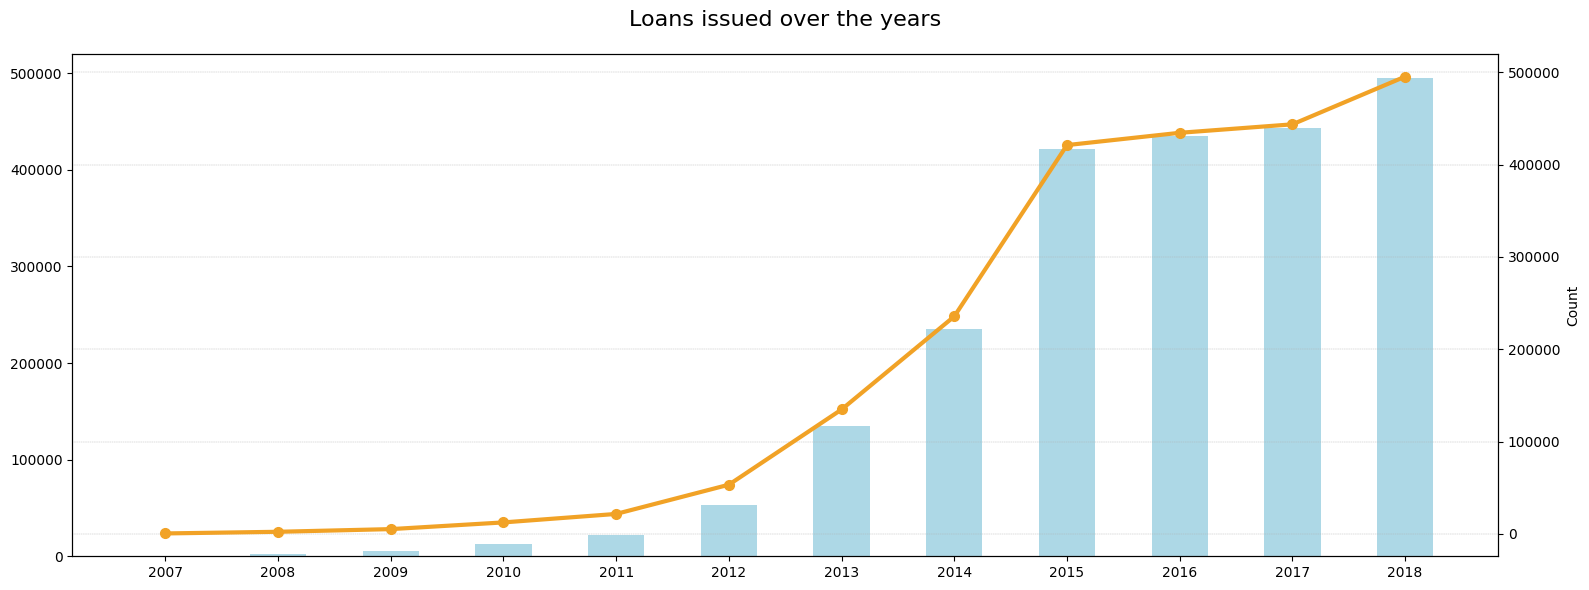

In [4]:
import matplotlib.pyplot as plt

# Create a new column for year extracted from 'issue_d'
full_df['issue_d_y'] = full_df['issue_d'].dt.strftime('%Y')

# Group by year and count occurrences
grouped = full_df['issue_d_y'].value_counts().sort_index().reset_index()
grouped.columns = ['issue_d_y', 'count']  # Rename columns for clarity

# Plotting
plt.figure(figsize=(16, 6))

# Bar plot
plt.bar(grouped['issue_d_y'], grouped['count'], color='lightblue', label='Count', width=0.5)

# Line plot with twinx for overlay
ax2 = plt.gca().twinx()
ax2.plot(
    grouped['issue_d_y'], grouped['count'], color='#f1a226',
    marker='o', linestyle='-', linewidth=3, markersize=7, label=''
)

# Labels and titles
plt.grid(True, axis='y', linestyle='--', linewidth=0.3)  # Dashed grid with thin lines on the y-axis
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Loans issued over the years',fontsize=16,   # Font size
              fontweight='normal',  # Font weight, 'normal' to avoid bold
              fontfamily='sans-serif', 
              pad = 20)

# Show plot
plt.tight_layout()


The plot above illustrates that the number of loans issued has been increasing over the years. However, the growth rate is showing a decreasing trend, as demonstrated in the subsequent analysis.

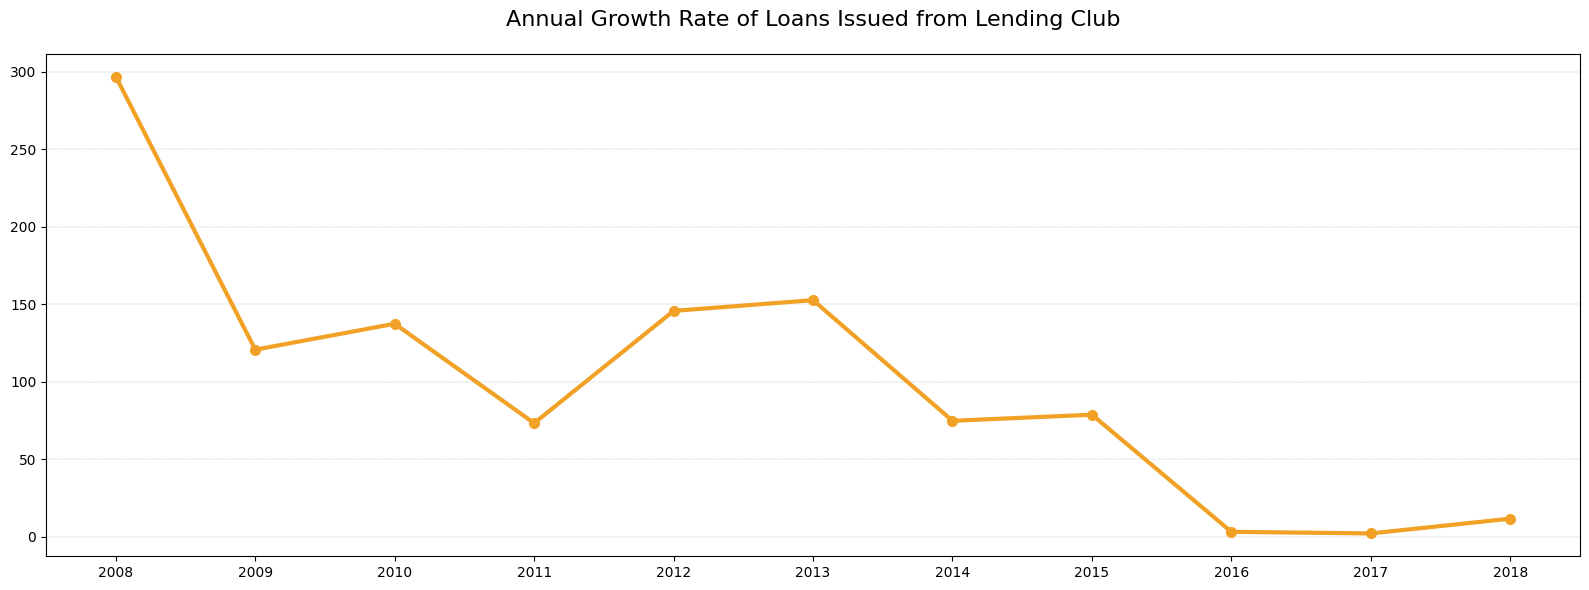

In [5]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(16, 6))

# Calculate the annual percentage change in the number of loans issued
grouped = full_df.groupby(['issue_d_y']).size().sort_index().pct_change() * 100

# Plot the growth rate
plt.plot(
    grouped,
    color='#f1a226',
    marker='o',
    linestyle='-',
    linewidth=3,
    markersize=7,
)

# Add grid lines
plt.grid(
    True,
    axis='y',
    linestyle='--',
    linewidth=0.3
)  # Dashed grid with thin lines on the y-axis

# Set the title and layout
plt.title(
    'Annual Growth Rate of Loans Issued from Lending Club',
    fontsize=16,
    fontweight='normal',
    fontfamily='sans-serif',
    pad=20
)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


It is evident that the growth rate of loans issued by Lending Club has been declining over the years. 


This trend suggests several potential factors at play. Lending Club may have reached a point where the market for its services is saturated, meaning there are fewer new borrowers entering the market. Other peer-to-peer lending platforms or traditional financial institutions might be capturing a larger share of the market, impacting Lending Club's growth. Other factor could be new regulations have been placed to limit the default rate. In addition, Change in borrower behavior is another important factor. Borrowers might be seeking alternative financing options, such as fintech solutions, other lending platforms, or traditional bank. A declining growth rate might affect investor confidence and the valuation of Lending Club. Therefore, the company needs to adapt its business model to mitigate the impact, such as diversifying its product range, exploring new loan products, personalized services, enhancing marketing efforts or optimizing operations. 

In [6]:
# Group the data by year and month, and count the number of loans issued in each group
issued_by_months = full_df.groupby(['issue_d_y', 'issue_d']).size().to_frame('Count').reset_index()

# For each year, find the index of the month with the maximum count of issued loans
idmax = issued_by_months.groupby(['issue_d_y'])['Count'].idxmax()

# Select the rows from the DataFrame corresponding to the indices with the maximum counts
max_issued_by_months = issued_by_months.loc[idmax]
max_issued_by_months

,issue_d_y,issue_d,Count
6,2007,2007-12-01,172
9,2008,2008-03-01,402
29,2009,2009-11-01,662
42,2010,2010-12-01,1335
54,2011,2011-12-01,2267
65,2012,2012-11-01,6382
78,2013,2013-12-01,15020
88,2014,2014-10-01,38783
100,2015,2015-10-01,48631
105,2016,2016-03-01,61992


The table indicates that a significant portion of loans are issued toward the end of the year. This pattern offers several insights:

- Increased Demand for Lending Services: Lenders may experience a surge in demand for their services at year-end, necessitating enhanced management and processing capabilities to handle the increased volume of applications.

- Operational Planning for Lenders: Recognizing this trend allows lenders to proactively adjust their operations and staffing to efficiently manage the peak periods at year-end.

In [7]:
# Customize format function
def format_func(num):
  magnitude = 0
  while abs(num) >= 1000:
    magnitude += 1
    num /=1000
  return '%.2f%s' % (num, ['', 'K', 'M'][magnitude])

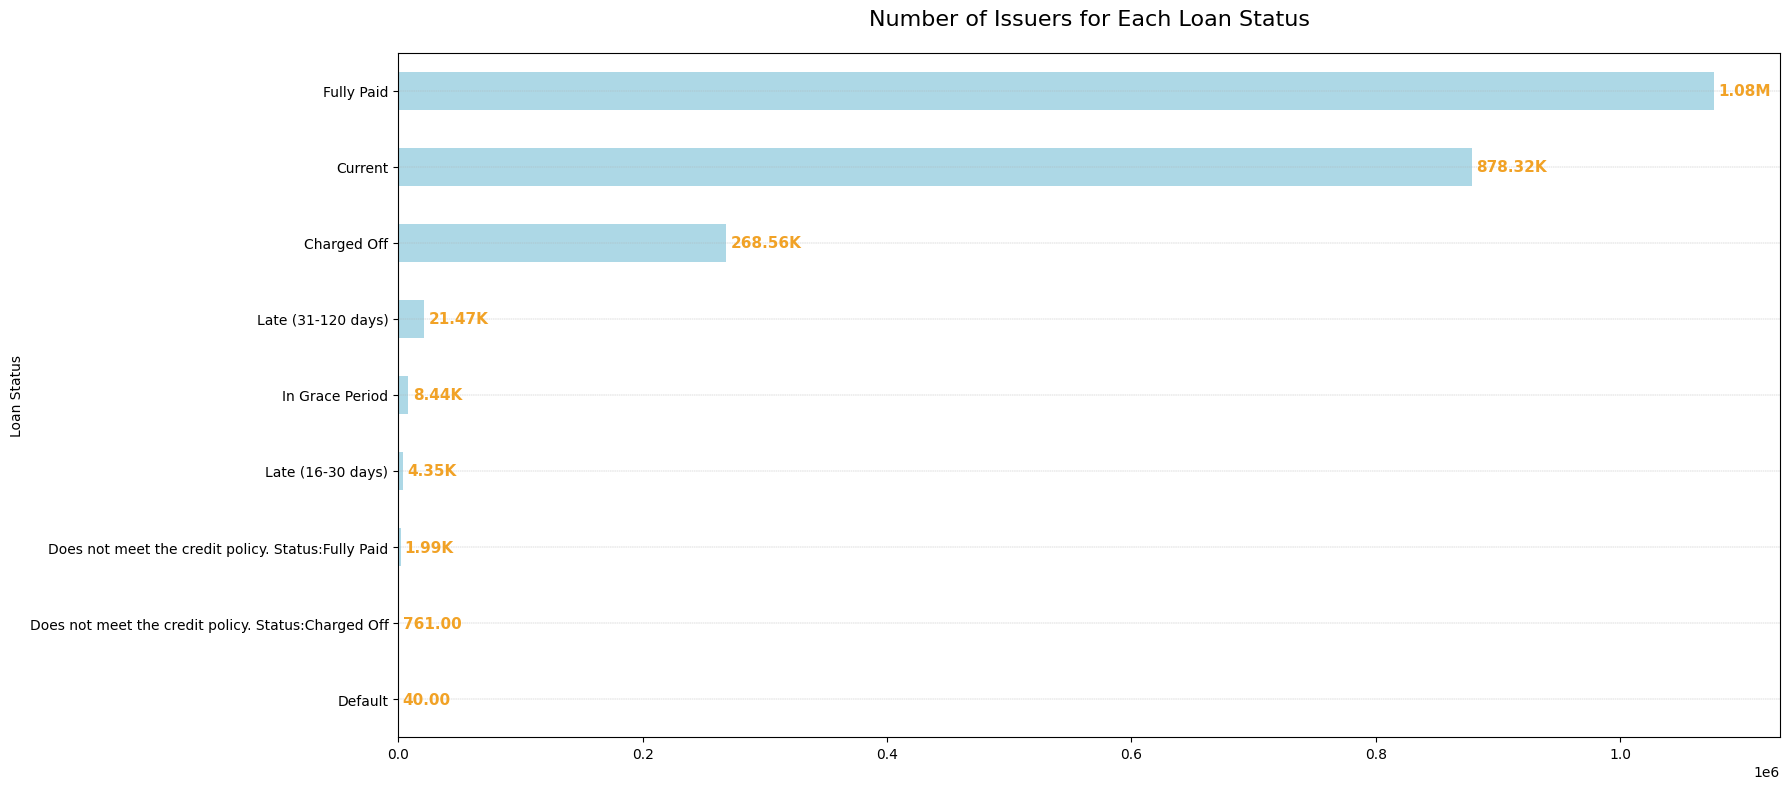

In [8]:
# Count occurrences of each loan status
status_counts = full_df['loan_status'].value_counts().sort_values()

# Set up the plot with a specified figure size
plt.figure(figsize=(18, 8))

# Create a horizontal bar chart of loan statuses
ax = status_counts.plot(kind='barh', color='lightblue')

# Label the bars in the chart, 
ax.bar_label(
    ax.containers[0],
    fmt=format_func,
    fontsize=11,
    fontweight='bold',
    padding=3,
    color='#f1a226'
)

# Set the x-axis label (empty in this case)
ax.set_xlabel('')

# Set the y-axis label
ax.set_ylabel('Loan Status')

# Set the title of the chart with specified font properties and padding
ax.set_title(
    'Number of Issuers for Each Loan Status',
    fontdict={'fontsize': 16, 'fontfamily': 'sans-serif'},
    pad=20
)
# Add grid lines
plt.grid(
    True,
    axis='y',
    linestyle='--',
    linewidth=0.3
)
# Display the plot
plt.tight_layout()
plt.show()



For the purpose of simplying the analysis, I will categorize the loans into two main groups: good loans and bad loans. Good loans will include those that are 'Fully Paid'. Bad loans will encompass statuses such as 'Charged Off', 'Late (31-120 days)', 'Late (16-30 days)','Does not meet the credit policy. Status:Charged Off' and 'Default'. This classification will help in distinguishing between successfully repaid loans and those that encountered repayment issues.

In [9]:
# List of loan statuses considered as bad loans or good loans
bad_loans = ['Charged Off', 'Late (31-120 days)', 'Late (16-30 days)', 
             'Does not meet the credit policy. Status:Charged Off', 'Default']
good_loans = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
# Update loan_status column for bad and good loans for both full dataset and filtered dataset
full_df.loc[full_df['loan_status'].isin(bad_loans), 'loan_status'] = 'bad loans'
full_df.loc[full_df['loan_status'].isin(good_loans), 'loan_status'] = 'good loans'

filtered_df.loc[filtered_df['loan_status'].isin(bad_loans), 'loan_status'] = 'bad loans'
filtered_df.loc[filtered_df['loan_status'].isin(good_loans), 'loan_status'] = 'good loans'
#filter only good and bad loans data
full_df = full_df[full_df['loan_status'].isin(['good loans', 'bad loans'])]
filtered_df = filtered_df[filtered_df['loan_status'].isin(['good loans', 'bad loans'])]
full_df.loan_status.unique()

array(['good loans', 'bad loans'], dtype=object)

In [10]:
table = full_df['loan_status'].value_counts(normalize = True)*100
table.to_frame()

,proportion
loan_status,
good loans,78.515701
bad loans,21.484299


Out of the total loans from the dataset, 21% are classified as bad loans. This high percentage underscores the importance of rigorous risk assessment and the need for effective risk management strategies. 



When constructing our model later on, it will be essential to address the challenge posed by the unbalanced dataset. 

In [11]:
# Calculate the percentage distribution of each loan status in the filtered DataFrame
table = filtered_df['loan_status'].value_counts(normalize=True) * 100 
table.to_frame()



,proportion
loan_status,
good loans,75.26221
bad loans,24.73779


In [ ]:
 
# Load US state geocode data
geo_code = pd.read_csv('US_GeoCode.csv')

# Group by state and loan status, calculate counts
grouped_state = full_data.groupby(['addr_state']).size().to_frame('Total_loans').reset_index()

# Calculate percentage of bad loans for each state (not include other loan status other than the good and bad loans defined earlier)
grouped_state_status = (full_df.groupby(['addr_state'])['loan_status'].value_counts(normalize = True)*100)\
                                                                                                .round(2).reset_index()
grouped_bad_status = grouped_state_status[grouped_state_status['loan_status'] == 'bad loans'].reset_index(drop = True)
grouped_state['bad_Pct'] = grouped_bad_status['proportion']

# Merge with geocode data based on state
grouped_state = pd.merge(grouped_state, geo_code, left_on='addr_state', right_on='state&teritory', how='inner')


# Filter data for 'bad loans'
data_frame = grouped_state.sort_values(by = 'bad_Pct', ascending = False).reset_index()

# Select top 5 highest and bottom 5 lowest values
top_10_pct = data_frame.nlargest(10, 'bad_Pct')
top_10_total = data_frame.nlargest(10, 'Total_loans')
bottom_10_pct = data_frame.nsmallest(10, 'bad_Pct')
bottom_10_total = data_frame.nsmallest(10, 'Total_loans')

# Highlight top and bottom values
data_frame['Highlight_pct'] = ''
data_frame['Highlight_total'] = ''

data_frame.loc[top_10_pct.index, 'Highlight_pct'] = 'top'
data_frame.loc[top_10_total.index, 'Highlight_total'] = 'top'
data_frame.loc[bottom_10_pct.index, 'Highlight_pct'] = 'bottom'
data_frame.loc[bottom_10_total.index, 'Highlight_total'] = 'bottom'
# Create choropleth map
fig = px.choropleth(
    data_frame=data_frame,
    locationmode="USA-states",
    locations='addr_state',
    color='bad_Pct',
    scope='usa',
    color_continuous_scale='OrRd',
    title='Choropleth Map of Bad Loan Percentages and Bubble Plot of Total Loans Issued',

)
hover_text = [
    f'<b>State:</b> {row["addr_state"]}<br><b>Total Loans:</b> {row["Total_loans"]:,}'
    for index, row in data_frame.iterrows()
]

# Add bubble plot with markers
fig.add_trace(
    go.Scattergeo(
        locationmode='USA-states',
        lon=data_frame['longitude'],
        lat=data_frame['latitude'],
        marker=dict(
            size=data_frame['Total_loans']/500,
            sizemode='area',
            color = 'grey'
        ),
        hoverinfo='text',
        text = hover_text

    )
)
# add table
fig.add_trace(
  go.Table(
    header=dict(
        values = ['State', 'Bad_Pct', 'Total'],
        font = dict(size = 10, weight = 'bold')
    ),
    cells=dict(values = [data_frame['addr_state'],
                         data_frame['bad_Pct'].round(2), 
                         data_frame['Total_loans'].map(format_func)],
                         fill=dict(color=[
                         ['white' for i in data_frame['addr_state']],
                         data_frame['Highlight_pct'].map({'top': '#FFA07A', 'bottom': '#FBCEB1', '':'white'}),
                         data_frame['Highlight_total'].map({'top': '#B6D0E2', 'bottom': '#cfd6dc', '': 'white'})
            ])),
    domain=dict(x=[0.85, 0.999], y=[0.01, 0.99]),
    columnwidth=[10, 10,12],
  )
)
#update layout
fig.update_layout(
    geo=dict(
        projection_type='albers usa',
        showland=True,
        landcolor='white',
        subunitwidth=1,
        countrywidth=1
    ),
    plot_bgcolor='#f0f0f0',
    geo_bgcolor='#f0f0f0',
     height=600,
    title_x=0.5
)
fig.show()

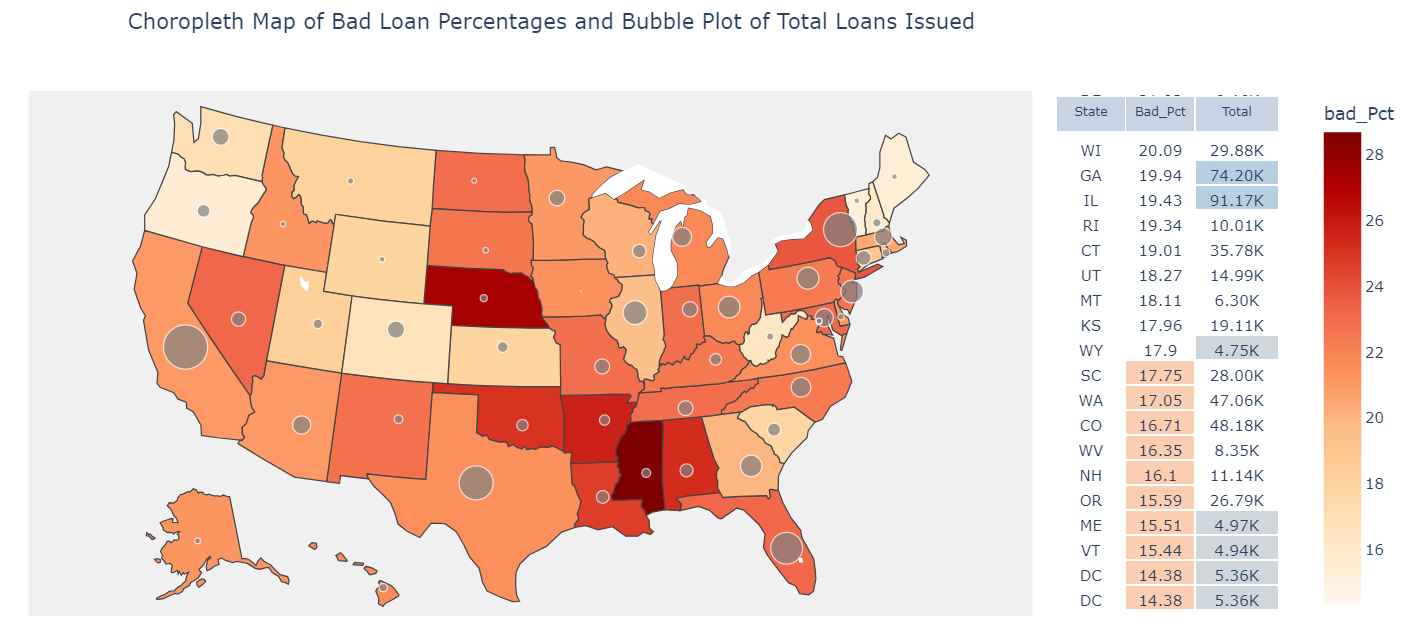

From the map, we can observe several key insights regarding the distribution of loans issued by Lending Club across various states. 


- New York, California, Texas and Florida stand out as the states with the largest number of loans issued. This can be attributed to their larger populations and higher economic activity, which likely result in greater demand for personal loans 
- Iowa is the state with the least number of loans issued by Lending Club. This might reflect its smaller population compared to the high-volume states, potentially lower demand for personal loans, or the lesser popularity of the online form of borrowing like Lending Club within the state
- Missisippi emerges as the state with the highest percentage of bad loans. This could be indicative of various socio-economic factors, including lower average income levels, higher unemployment rates, or higher unemployment rates, or other economic challenges that increase the risk of loan defaults
-The high percentage of bad loans in Mississipi highlights the importance of understanding regional economic conditions when assessing credit risk. Lenders might need to implement stricter credit evaluation processes or tailor financial products and services that meet the specific needs of different regions to mitigate the risk of defaults in regions that have high percentage of bad loans such as Mississipi. 

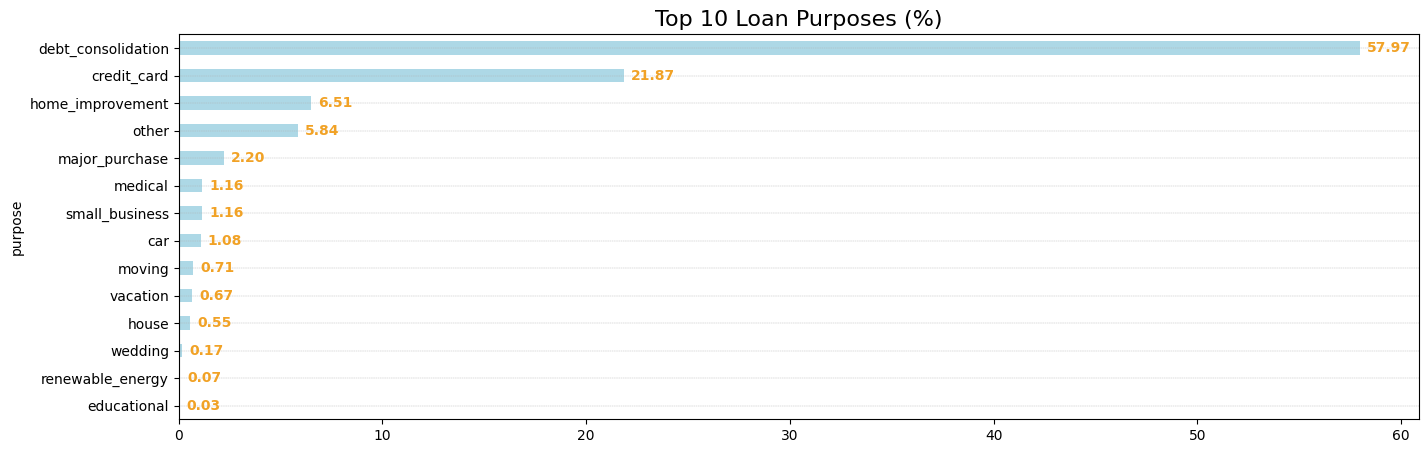

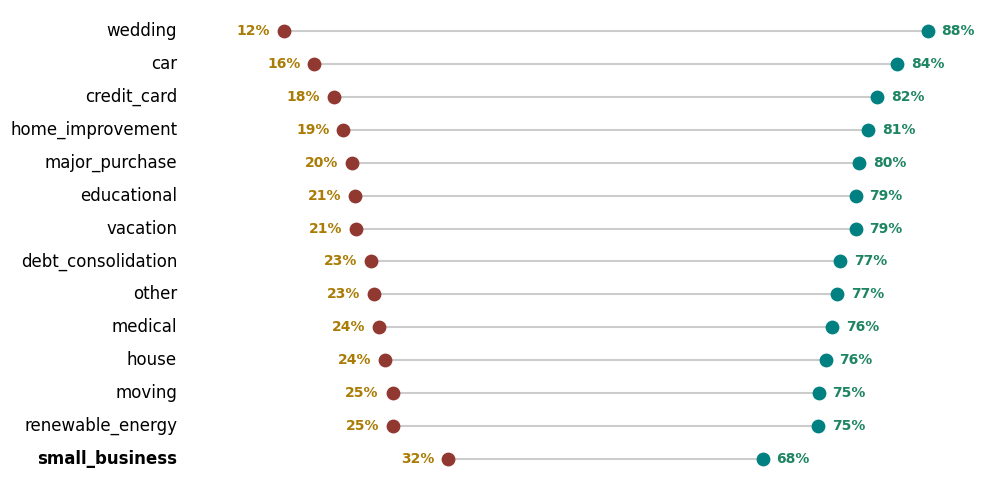

In [13]:
fig, ax = plt.subplots(figsize=(16,5))

grouped_purpose = (full_df['purpose'].value_counts(normalize=True).round(4)*100)
ax = grouped_purpose.sort_values(ascending=True).plot.barh(color = 'lightblue')
for container in ax.containers:
  ax.bar_label(container, fmt = f'%.2f', fontsize=10, padding=5, color = '#f1a226', fontweight = 'bold')
plt.grid(
    True,
    axis='y',
    linestyle='--',
    linewidth=0.3
)
plt.title('Top 10 Loan Purposes (%)', fontsize =16, fontfamily = 'sans-serif')
plt.show()

loan_status_purpose = full_df.groupby(['purpose'])['loan_status'].value_counts(normalize=True).unstack(level = 1).reset_index().sort_values(by='bad loans', ascending = False).reset_index(drop=True)
good_loans = loan_status_purpose['good loans']
bad_loans = loan_status_purpose['bad loans']

bad_color, good_color = "#913831", "#008080",
bad_color_dark, good_color_dark = "#aa7c05", "#1e8563"
fig, ax = plt.subplots(figsize=(10,5))
my_range = range(loan_status_purpose['purpose'].nunique())
ax.hlines(y = my_range, xmin=bad_loans, xmax=good_loans, color ='grey', alpha = 0.4)
ax.scatter(bad_loans, my_range, color = bad_color, zorder = 2, s=80)
ax.scatter(good_loans, my_range, color = good_color, zorder = 2, s=80)
n = len(loan_status_purpose)
for i in range(loan_status_purpose['purpose'].nunique()):
  purpose_name = loan_status_purpose['purpose'][i]
  if purpose_name == 'small_business':
    font='bold'
    purpose_highest_bad = loan_status_purpose[loan_status_purpose['purpose'] == purpose_name]
    ax.hlines(y=i, xmin =  purpose_highest_bad['bad loans'], xmax = purpose_highest_bad['good loans'], linewidth =3, color = 'white', zorder = 1 )
  else:
    font = 'medium'
  ax.text(
        0, i, f'{purpose_name}',
        ha='right', va='center',
        fontsize=12, fontweight=font
    )
  bad = loan_status_purpose['bad loans'][i]
  ax.text(
        bad - 0.016, i,
        f"{bad*100:.0f}%",
        ha='right',
        va='center',
        fontsize=10,
        fontweight='bold',
        color=bad_color_dark
    )
  good = loan_status_purpose['good loans'][i]
  ax.text(
        good + 0.016, i,
        f"{good*100:.0f}%",
        ha='left',
        va='center',
        fontsize=10,
        fontweight='bold',
        color=good_color_dark
    )

plt.grid(
    True,
    axis='y',
    linestyle='--',
    linewidth=0.3
)
ax.set_axis_off()

plt.tight_layout()
plt.show()


Among all loan purposes, debt consolidation has the largest number of loans, followed by credit card and home improvement. Small business loans stand out with the highest proportion of bad loans, while wedding loans have the lowest. 


Given that small business loans have the highest proportion of bad loans, it's crucial to enhance risk assessment and management practices specific to this category. Consider stricter eligibility criteria, more thorough financial scrutiny, and perhaps specialized loan products that cater to small businesses' unique challenges.

In [14]:
# replace home_ownership data entries with 'other' for 'ANY' and 'NONE'
full_df.loc[full_df['home_ownership'].isin(['ANY','NONE']),'home_ownership'] = 'OTHER'


<Figure size 1600x800 with 0 Axes>

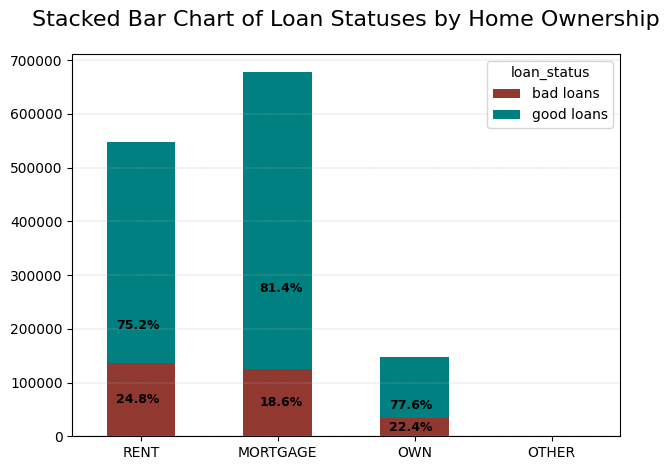

In [51]:
# Group data by home ownership and count occurrences of each loan status
grouped_home_ownership_cnt = full_df.groupby(['home_ownership'])['loan_status'].value_counts().unstack(level=1).sort_values(by='bad loans', ascending=False)

# Calculate the percentage of each loan status within each home ownership type
grouped_home_ownership_pct = full_df.groupby(['home_ownership'])['loan_status'].value_counts(normalize=True).unstack(level=1)

# Set up the plot with a specified figure size
plt.figure(figsize=(16, 8))

# Plot a stacked bar chart showing the count of each loan status by home ownership type
grouped_home_ownership_cnt.plot(
    kind='bar',
    stacked=True,
    color=['#913831', '#008080']
)

# Add labels showing proportions of each loan status for each home ownership type
for home_ownership in ['RENT', 'MORTGAGE', 'OWN']:
    for loan_status in ['bad loans', 'good loans']:
        count = grouped_home_ownership_cnt.loc[home_ownership, loan_status]
        pct = grouped_home_ownership_pct.loc[home_ownership, loan_status]
        if count > 0: 
            plt.text(
                grouped_home_ownership_cnt.index.get_loc(home_ownership) + (0.025 if home_ownership == 'MORTGAGE' else -0.025),
                count - count / 2,
                f'{pct:.1%}',
                ha='center',
                va='center',
                color='black',
                fontsize=9,
                fontweight='bold',
                fontfamily='sans-serif'
            )

# Add grid lines on the y-axis
plt.grid(
    True,
    axis='y',
    linestyle='--',
    linewidth=0.3
)

# Set x-axis labels orientation
plt.xticks(rotation=0)

# Set x-axis label (empty in this case)
plt.xlabel('')

# Add the title to the plot
plt.title('Stacked Bar Chart of Loan Statuses by Home Ownership', 
          fontdict={'fontsize': 16, 'fontfamily': 'sans-serif'}, pad=20)

# Display the plot
plt.tight_layout()
plt.show()


Although borowers who are currently making payments on a mortgage loan account for the largest number of total loans, those with rental status have the highest proportion of delinquent or defaulted loans (bad loans).

Home ownership status could be a significant factor in predicting loan default risk.


Now, I will perform a permutation test to determine whether there is a significant difference in the proportion of bad loans between the RENT and MORTGAGE homeownership groups. I chose to use a permutation test over other non-parametric tests because it allows for resampling of the data. This method enables me to assess whether the observed difference falls within the range of random chance or represents a true difference in proportions between the two groups, even without having predefined samples. 

In [16]:
grouped_home_ownership_cnt.unstack().to_frame('Count').reset_index()

,loan_status,home_ownership,Count
0,bad loans,RENT,135768
1,bad loans,MORTGAGE,126135
2,bad loans,OWN,33152
3,bad loans,OTHER,121
4,good loans,RENT,411258
5,good loans,MORTGAGE,551956
6,good loans,OWN,115106
7,good loans,OTHER,419


In [17]:
# Reorganize the grouped_home_ownership_cnt table and add the sum along both axes
grouped_home_ownership_cnt = grouped_home_ownership_cnt.unstack().to_frame('Count').reset_index()
grouped_home_ownership_cnt = pd.pivot(grouped_home_ownership_cnt, columns = 'home_ownership', index='loan_status', values = 'Count' )[['MORTGAGE', 'RENT']]

grouped_home_ownership_cnt.loc['sum']  = grouped_home_ownership_cnt.sum(axis = 0)
grouped_home_ownership_cnt['sum'] = grouped_home_ownership_cnt.sum(axis = 1)
grouped_home_ownership_cnt



home_ownership,MORTGAGE,RENT,sum
loan_status,,,
bad loans,126135,135768,261903
good loans,551956,411258,963214
sum,678091,547026,1225117


In [124]:
# Define a permutation function to calculate the difference in means between two groups
def perm_fun(x, nA, nB):
    n = nA + nB  # Total number of samples
    idx_B = set(random.sample(range(n), nB))  # Randomly select indices for group B
    idx_A = set(range(n)) - idx_B  # Remaining indices belong to group A
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()

# Extract counts of loans for 'MORTGAGE' and 'RENT' home ownership categories
mort_cnt = grouped_home_ownership_cnt.at['sum', 'MORTGAGE']
rent_cnt = grouped_home_ownership_cnt.at['sum', 'RENT']

# Extract counts of bad loans for 'MORTGAGE' and 'RENT' home ownership categories
mort_bad_cnt = grouped_home_ownership_cnt.at['bad loans', 'MORTGAGE']
rent_bad_cnt = grouped_home_ownership_cnt.at['bad loans', 'RENT']

# Calculate the percentage of bad loans for 'MORTGAGE' and 'RENT'
mort_bad_pct = mort_bad_cnt / mort_cnt * 100
rent_bad_pct = rent_bad_cnt / rent_cnt * 100

# Calculate the observed difference in bad loan percentages between 'RENT' and 'MORTGAGE'
obs_pct_dif = rent_bad_pct - mort_bad_pct
print(f'Observed difference: {obs_pct_dif}')

# Extract total counts of bad and good loans
bad_cnt = grouped_home_ownership_cnt.at['bad loans', 'sum']
good_cnt = grouped_home_ownership_cnt.at['good loans', 'sum']

# Create a series representing loan statuses (1 for bad loans, 0 for good loans)
loan_st = [1] * bad_cnt
loan_st.extend([0] * good_cnt)
loan_st = pd.Series(loan_st)

# Perform 3000 permutations to calculate differences in bad loan percentages
perm_diffs = [100 * perm_fun(loan_st, mort_cnt, rent_cnt) 
              for _ in range(3000)]


Observed difference: 6.217809968041735


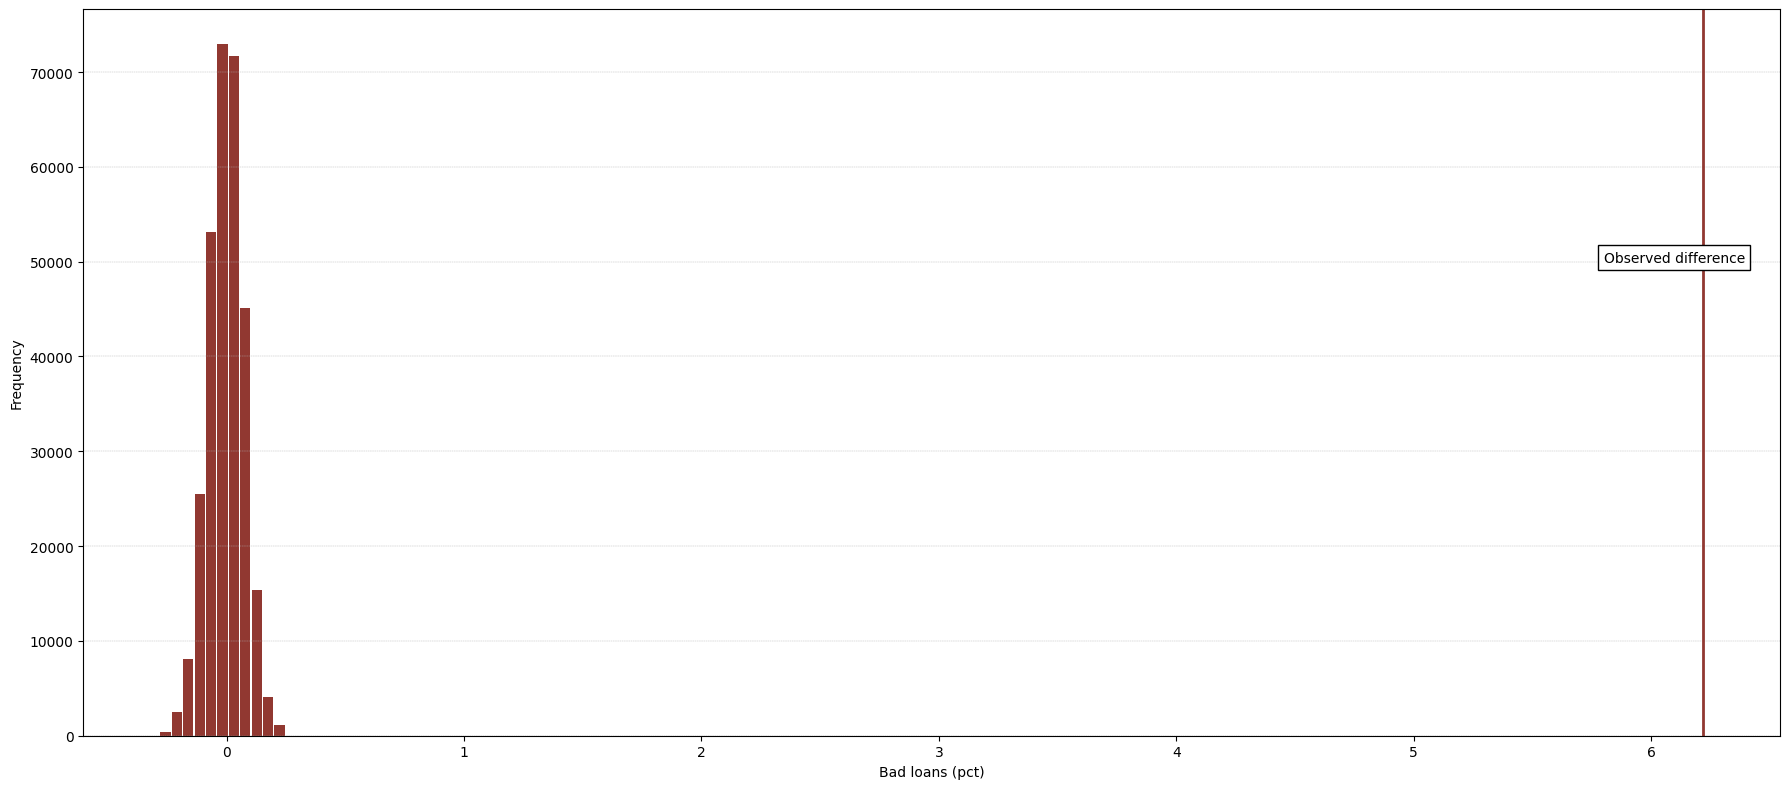

In [277]:
# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(18, 8))

# Plot histogram of permutation differences scaled by 100
ax.hist(perm_diffs * 100, bins=11, rwidth=0.9, color='#913831')

# Add a vertical line for the observed difference in bad loan percentages
ax.axvline(x=obs_pct_dif, color='#913831', lw=2)

# Add text annotation for the observed difference
ax.text(5.8, 50000, 'Observed difference', bbox={'facecolor': 'white'}, fontsize=10)

# Set x-axis and y-axis labels
ax.set_xlabel('Bad loans (pct)')
ax.set_ylabel('Frequency')

# Add grid lines only on the y-axis
plt.grid(
    True,
    axis='y',
    linestyle='--',
    linewidth=0.3
)

# Adjust layout to fit all elements within the figure
plt.tight_layout()

# Display the plot
plt.show()


As you can see from the graph, the observed difference is well above the range of random chance, which means that the difference in the bad loans proportions between the two groups is significant.

<Figure size 1800x800 with 0 Axes>

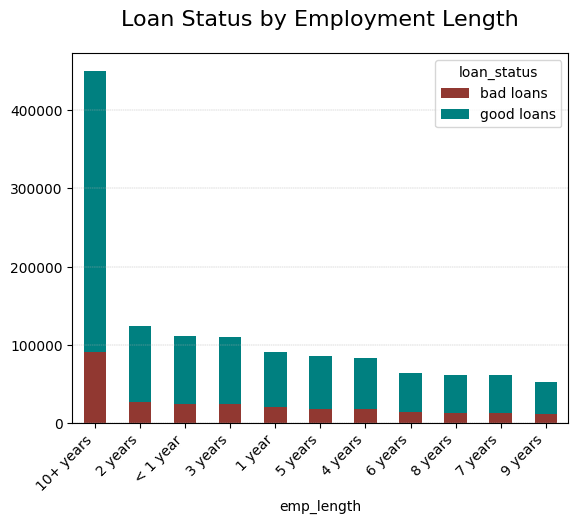

loan_status,bad loans,good loans
emp_length,,
< 1 year,22.30,77.70
1 year,22.10,77.90
3 years,21.54,78.46
4 years,21.38,78.62
2 years,21.34,78.66
8 years,21.14,78.86
5 years,21.11,78.89
9 years,21.09,78.91
6 years,20.79,79.21


In [18]:

# Set up the figure size
plt.figure(figsize=(18, 8))
# Group by 'emp_length' and get value counts for 'loan_status', then unstack and sort
loan_status_by_length = (full_df.groupby(['emp_length'])['loan_status']
                         .value_counts()
                         .unstack(level=1)
                         .sort_values(by='bad loans', ascending=False))

# Plot the grouped data as a stacked bar chart
loan_status_by_length.plot(kind='bar', stacked=True, color=['#913831', '#008080'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Group by 'emp_length' and get proportions for 'loan_status', then unstack and sort
loan_status_by_length_pct = ((full_df.groupby(['emp_length'])['loan_status']
                             .value_counts(normalize=True) * 100)
                             .round(2)
                             .unstack(level=1)
                             .sort_values(by='bad loans', ascending=False))
plt.title('Loan Status by Employment Length', pad = 20, fontsize = 16, fontfamily = 'sans-serif')
# Display the plot
plt.grid(
    True,
    axis='y',
    linestyle='--',
    linewidth=0.3
)
plt.show()
display(loan_status_by_length_pct)


As depicted, issuers with 10 years of experience accounted for the highest number of loans issued, and they also exhibited the lowest incidence of defaults. Conversely, individuals with only 1 year of work experience had the highest proportion of bad loans


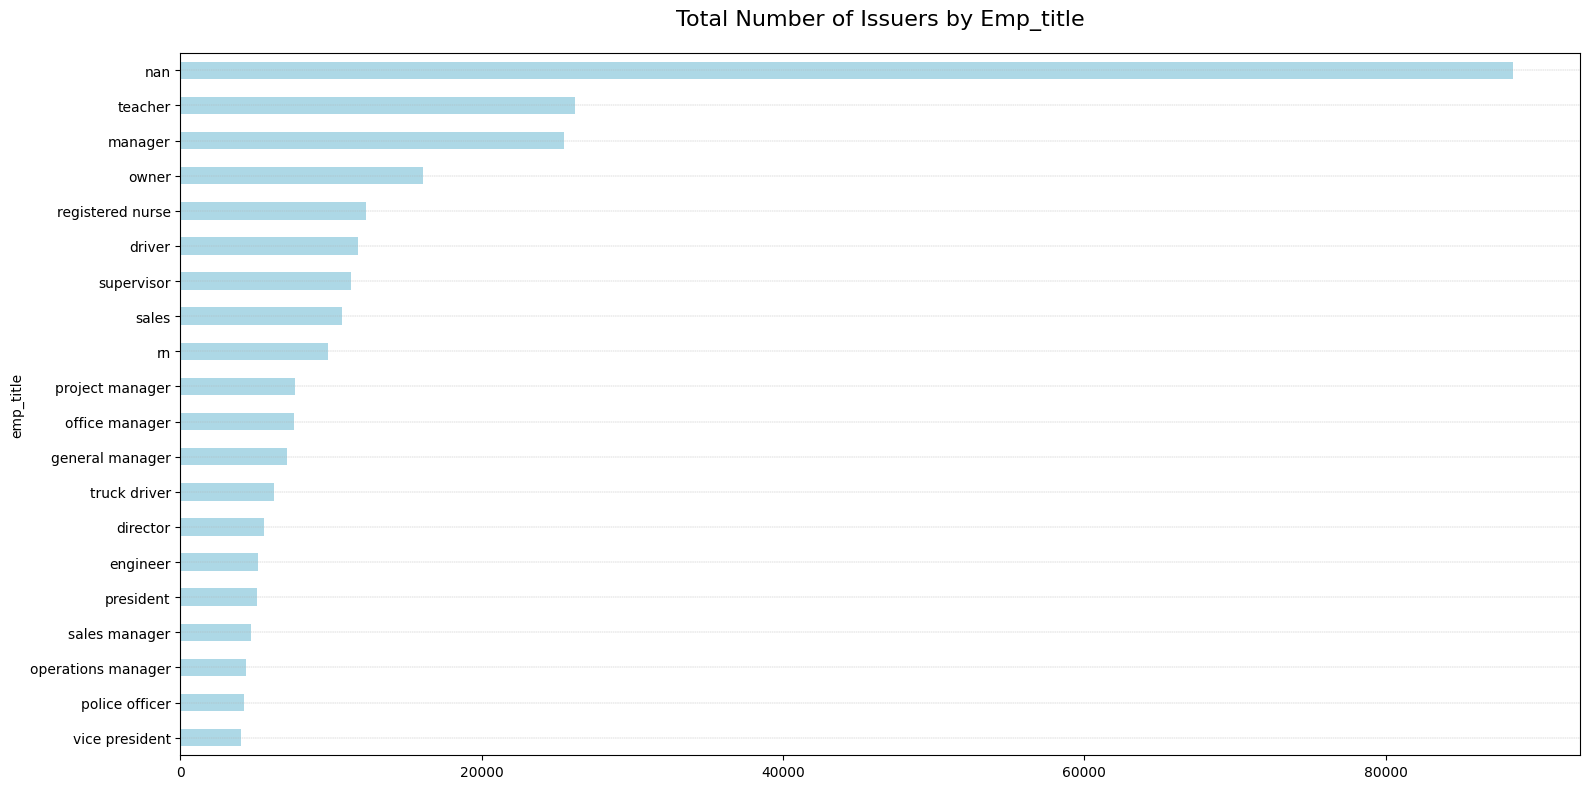

In [19]:
plt.figure(figsize=(16,8))
full_df['emp_title'] = (full_df['emp_title']
                        .apply(lambda x: str(x).lower() if not None else x))


top_20_emp_title = (full_df.dropna(subset = 'emp_title')['emp_title']
                    .value_counts()
                    .nlargest(20)
                    .sort_values())
top_20_emp_title.plot(kind='barh', color = 'lightblue')
plt.title('Total Number of Issuers by Emp_title', 
          fontsize = 16, 
          fontfamily = 'sans-serif', 
          pad = 20)
plt.grid(
    True,
    axis='y',
    linestyle='--',
    linewidth=0.3
)
plt.tight_layout()
plt.show()


The title 'nan' here is due to a lack of the related information.

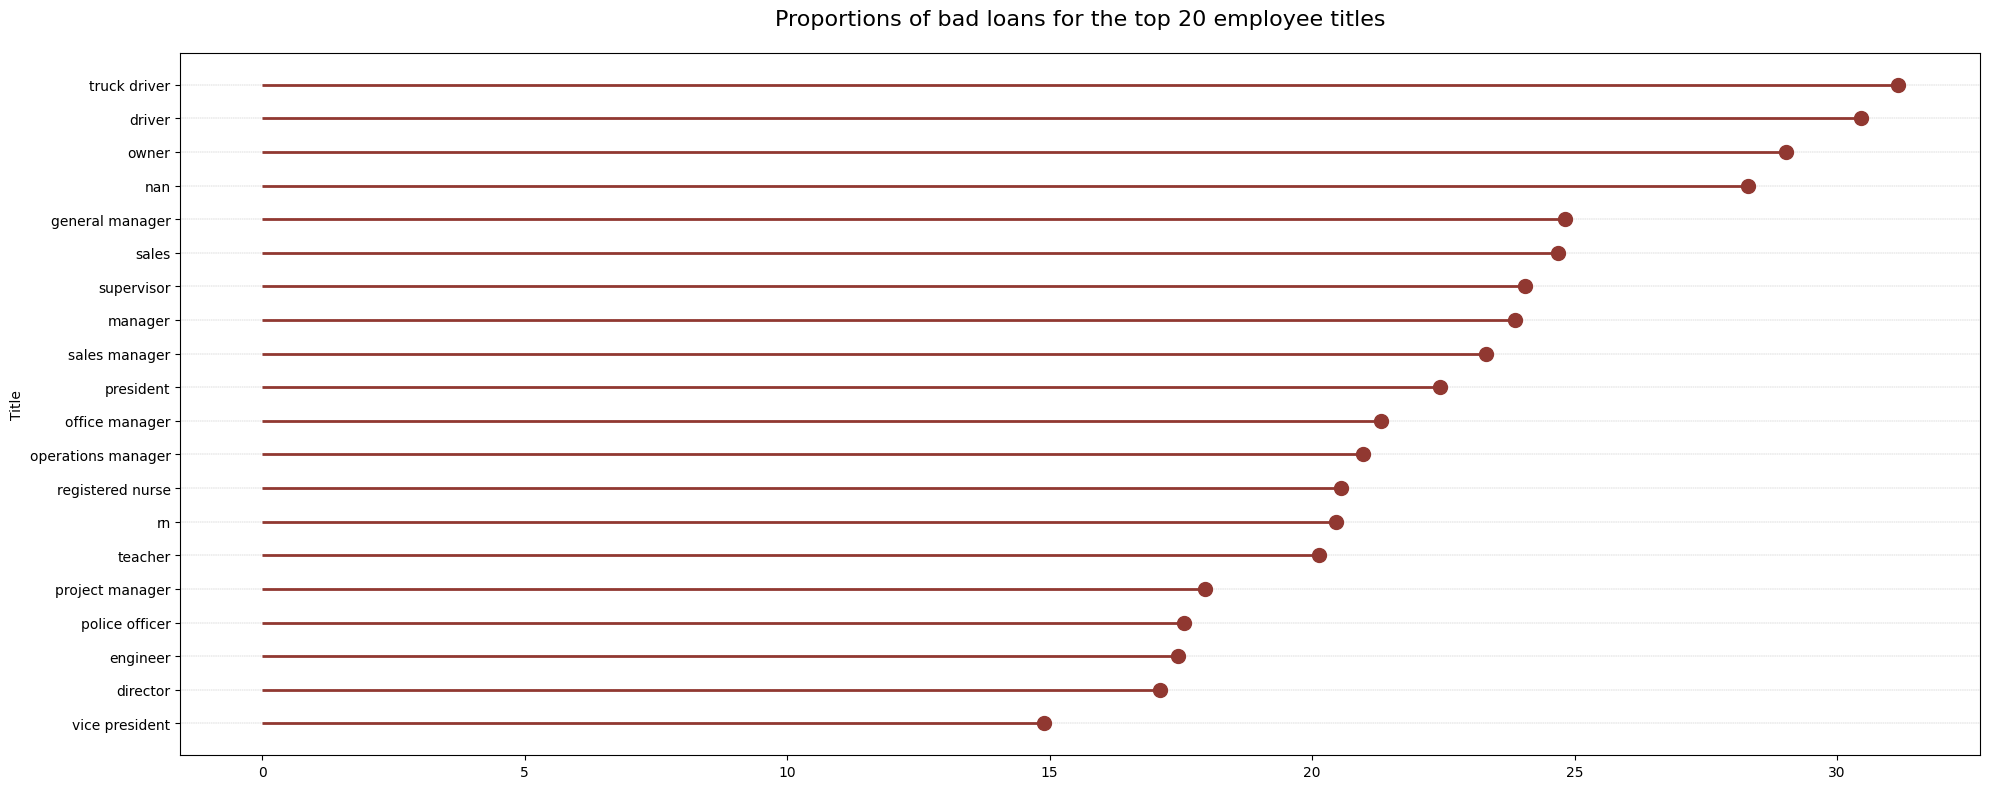

In [20]:
import matplotlib.pyplot as plt

# Convert top 20 employee titles to lowercase for consistency
top_20_emp_title_list = [title.lower() for title in list(top_20_emp_title.index)]

# Convert all employee titles in the DataFrame to lowercase for case-insensitive matching
full_df['emp_title'] = full_df['emp_title'].apply(lambda x: str(x).lower() if not None else x)

# Calculate the percentage of loan statuses for the top 20 employee titles and fill any missing values with 0
loan_status_by_top_title = (
    (full_df.loc[full_df['emp_title'].isin(top_20_emp_title_list)]
    .groupby(['emp_title'])['loan_status']
    .value_counts(normalize=True) * 100)
    .unstack()
    .fillna(0)
)

# Add a total count column for the number of employees with each title in the top 20 list
loan_status_by_top_title['total'] = (
    full_df.loc[full_df['emp_title'].isin(top_20_emp_title_list)]['emp_title']
    .value_counts()
)

# Set up the figure size for the plot
plt.figure(figsize=(20, 8))

# Generate a range for the y-axis positions
my_range = range(1, len(loan_status_by_top_title) + 1)

# Sort the 'bad loans' column in ascending order for clear visualization
loan_status_by_top_title = loan_status_by_top_title.sort_values(by='bad loans', ascending=True)['bad loans']

# Create horizontal lines for each title's bad loan proportion
plt.hlines(y=my_range,
           xmin=0, 
           xmax=loan_status_by_top_title, 
           color='#913831', 
           linewidth=2)

# Plot points on the lines for emphasis
plt.plot(loan_status_by_top_title,
         my_range, 'o', 
         color='#913831',
         markersize=10)

# Set the y-axis ticks to the employee titles
plt.yticks(my_range, loan_status_by_top_title.index)

# Add a title with specified font size, family, and padding
plt.title('Proportions of bad loans for the top 20 employee titles', 
          fontsize=16, 
          fontfamily='sans-serif', 
          pad=20)

plt.xlabel('')

plt.ylabel('Title')
plt.grid(
    True,
    axis='y',
    linestyle='--',
    linewidth=0.3
)

# Adjust layout to fit elements within the figure
plt.tight_layout()

# Display the plot
plt.show()


In [21]:
# Remove any leading or trailing spaces from the 'term' column values
full_df['term'] = full_df['term'].apply(lambda x: x.strip() if x is not None else x)

# Group the DataFrame by 'term' and count the occurrences of each 'loan_status', then unstack the result to create separate columns for each status
loan_status_by_term = full_df.groupby('term')['loan_status'].value_counts().unstack(level='loan_status')

# Calculate the percentage of each 'loan_status' within each 'term' group, then unstack the result for separate columns
loan_status_by_term_pct = full_df.groupby('term')['loan_status'].value_counts(normalize=True).unstack(level='loan_status')

loan_status_by_term_pct

loan_status,bad loans,good loans
term,,
36 months,0.172357,0.827643
60 months,0.346245,0.653755


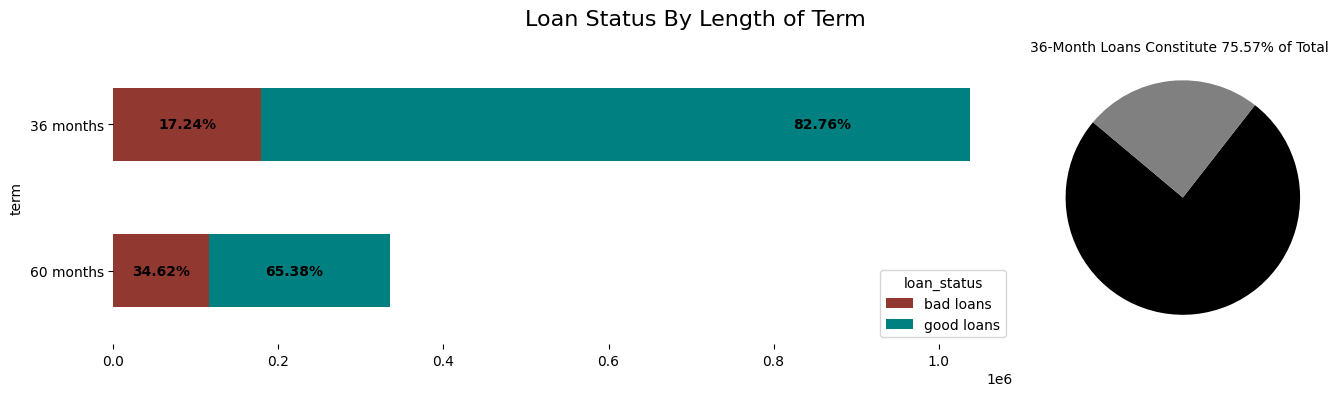

In [50]:
# Create a figure with two subplots, side by side, with a specified width ratio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4), 
                               gridspec_kw={'width_ratios': [3, 1]})

# Plot a horizontal stacked bar chart of loan status by term
loan_status_by_term.sort_values(by='bad loans').plot(kind='barh', 
                                                     stacked=True, 
                                                     color=['#913831', '#008080'], 
                                                     ax=ax1, width=0.5)

# Remove the borders (spines) from the bar chart
for spine in ax1.spines.values():
    spine.set_visible(False)

# Plot a pie chart of the loan terms distribution
ax2.pie(full_df['term'].value_counts(), startangle=140, colors=['black', 'grey'])

# Calculate the percentage of 36-month loans and add it as a text annotation
term_pct = round(len(full_df[full_df['term'] == '36 months']) / len(full_df) * 100, 2)
ax2.text(x=-1.3, y=1.25, s=f'36-Month Loans Constitute {term_pct}% of Total')

# Set the main title for the figure
fig.suptitle('Loan Status By Length of Term', 
             fontsize=16, 
             fontfamily='sans-serif')

# Adjust the top parameter to create more space above the plots
fig.subplots_adjust(top=0.9)

# Annotate the percentage of each loan status within the bar chart
for i, term in enumerate(['60 months', '36 months']):
    for loan_status in ['bad loans', 'good loans']:
        pct = loan_status_by_term_pct.loc[term, loan_status]
        count = loan_status_by_term.loc[term, loan_status]
        if loan_status == 'bad loans':
            ax1.annotate(f'{round(pct * 100, 2)}%', (count / 2, i), 
                         ha='center', va='center', 
                         color='black', fontsize=10, fontweight='bold')
        else:
            ax1.annotate(f'{round(pct * 100, 2)}%', (count, i), 
                         ha='center', va='center', color='black', 
                         fontsize=10, fontweight='bold')

plt.grid(True, axis='y', linestyle='--', linewidth=0.3)

plt.tight_layout()


In [31]:
# Group the data by 'grade' and count the occurrences of each 'loan_status', then unstack to get a DataFrame
loan_status_by_grade = (full_df.groupby('grade')['loan_status']
                                .value_counts()
                                .unstack(level=1))

# Calculate the percentage of each 'loan_status' within each 'grade' and unstack to get a percentage DataFrame
loan_status_by_grade_pct = (full_df.groupby('grade')['loan_status']
                            .value_counts(normalize=True)
                            .unstack(level=1))

# Add a new column 'sum' that contains the sum of loan statuses for each grade
loan_status_by_grade['sum'] = loan_status_by_grade.sum(axis=1)

# Sort the DataFrame by the 'sum' column to order grades based on the total number of loans
loan_status_by_grade = loan_status_by_grade.sort_values(by='sum')


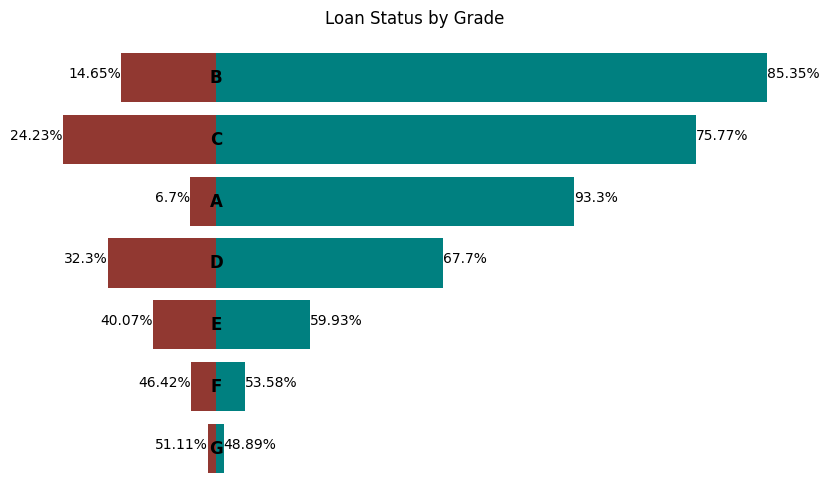

In [32]:
# Create a figure and a horizontal bar plot with customized size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 'good loans' as a positive bar chart (teal color)
ax.barh(loan_status_by_grade.index, 
        loan_status_by_grade['good loans'],
        color='#008080', alpha=1)

# Plot 'bad loans' as a negative bar chart (maroon color)
ax.barh(loan_status_by_grade.index, 
        -loan_status_by_grade['bad loans'],
        color='#913831', alpha=1)

# Set the title of the plot
ax.set_title('Loan Status by Grade')

# Remove x and y ticks from the plot
ax.set_xticks([])
ax.set_yticks([])

# Remove all spines (borders) from the plot
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Annotate the grade names and loan status percentages on the bars
for i, grade in enumerate(loan_status_by_grade.index):
    # Place the grade label at the center of the bar
    ax.text(0, i, grade, ha='center', va='center', fontsize=12, fontweight='bold')
    # Place the percentage for 'bad loans' on the left side of the bar
    ax.text(-loan_status_by_grade.at[grade, 'bad loans'], 
            i, 
            f"{round(loan_status_by_grade_pct.at[grade, 'bad loans'] * 100, 2)}%", 
            ha='right')
    # Place the percentage for 'good loans' on the right side of the bar
    ax.text(loan_status_by_grade.at[grade, 'good loans'], 
            i, 
            f"{round(loan_status_by_grade_pct.at[grade, 'good loans'] * 100, 2)}%", 
            ha='left')


In [34]:
cat_columns = full_df.select_dtypes(include = 'object').columns.drop(
      ['id','url', 'desc','hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date','settlement_date','last_pymnt_d', 'next_pymnt_d',
       'issue_d_y', 'url'])
cat_columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_credit_pull_d', 'application_type',
       'verification_status_joint', 'sec_app_earliest_cr_line',
       'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
       'settlement_status'],
      dtype='object')